# Minicurso 6 - Classificação e Segmentação de COVID-19 em Imagens de Tomografia Computadorizada Usando Aprendizado Profundo

## Sumário 

1. Introdução
2. Imagens Médicas
3. Aquisição de Imagens
4. Pré-Processamento
5. Inteligência Artificial
6. Experimentos
7. Resultados

## Introdução

### COVID-19

A COVID-19 é uma doença causada pelo novo coronavírus (SARS-COV-2), essa doença é altamente infecciosa com diversos sintomas que são facilmente confundidos com outras doenças, tais como a pneumonia viral ou bacteriana. A COVID-19 apresenta diversos sintomas que podem variar em cada paciente, podendo apresentar quadros clínicos leves e recuperações rápidas. Porém, em outros casos podem apresentar problemas de saúde graves, com pneumonia, insuficiência respiratória, falência de órgãos e outras complicações. O número global de casos e mortes para essa doença somam mais de 500 milhões e mais de 6 milhões em maio de 2022, respectivamente. Em meio a tantos casos e pacientes com diversos tipos de sintomas diferentes, o diagnóstico em estágio inicial é imprescindível para conseguir aumentar a taxa de sobrevivência dos pacientes e evitar a contaminação de mais pessoas.

Para realizar o diagnóstico em estágio inicial é utilizado o exame da reação em cadeia da polimerase com transcrição reversa em tempo real (RT-PCR) com cotonetes faríngeos, esse teste foi adotado como padrão em todo o mundo. Porém, para apoiar o trabalho dos especialistas responsáveis por diagnosticar a doença COVID-19, outros métodos de prevenção, e diagnóstico têm sido extensivamente explorados e estudados. Com isso o uso de métodos como os exames de radiografia e Tomografia Computadorizada (TC) estão sendo amplamente utilizados para acompanhar a progressão dessa doença, com isso é possível realizar observações de pacientes com COVID-19 que estão com pioras no estado respiratório e em ambientes com poucos recursos na triagem médica de pacientes com suspeita de ter COVID-19.

Com base nas pesquisas, para a COVID-19, a radiografia apresenta baixa sensibilidade e especificidade comparada com a Tomografia de Tórax, enquanto a Tomografia Computadorizada, apresenta-se como um método eficaz, sendo um meio alternativo e confiável para detectar lesões causadas pela COVID-19 devido ao seu nível de detalhes.

Porém, a análise das imagens geradas pelo exame da TC de tórax requer um grande esforço manual devido a quantidade de imagens geradas durante esse exame, o que torna o trabalho e a análise de muitos exames desgastante, exigindo também uma equipe que esteja familiarizada com os achados nas imagens que são sugestivas a características de pneumonia viral compatível com a COVID-19.

Pensando nisso, o presente capítulo tem como objetivo classificar e segmentar as regiões das lesões causadas pela COVID-19. Com a classificação das imagens os especialistas podem focar apenas nas análises das imagens classificadas como positivas para COVID-19, diminuindo assim a quantidade de imagens a serem analisadas, e com a segmentação das lesões, pretendemos aliviar o esforço manual dos especialistas, sendo possível contribuir com as marcações automática das lesões para facilitar as analises, além de dar apoio na visualização da progressão dessa doença nos pulmões, podendo assim acompanhar o quadro clínico a partir das marcações feitas.

Para a tarefa de segmentação, iremos utilizar a U-Net, juntamente com técnicas para o pré-processamento proposto. Para a classificação a VGG-19 é utilizada com transferência de aprendizado, juntamente com um modelo baseado na arquitetura LeNet-5.

### Imagens Médicas 

Os exames por imagens são uma especialidade médica que faz uso das tecnologias de imagens com o intuito de realizar o diagnóstico de vários tipos de doenças. Esses exames são utilizados para obter imagens do interior do corpo humano e realizar a análise clínica.

Com isso essas técnicas vem sendo aprimoradas, podendo mostrar com particularidades a estrutura do corpo humano e também são capazes de exibir os tecidos da parte interna do corpo humano.

Na figura abaixo, podemos observar os exames mais utilizados e difundidos. Em (a), temos a radiografia, em (b) Tomografia Computadorizada do tórax, em (c) ressonância magnética, em (d) mamografia, em (e) exame histopatológico, em (f) mapeamento de retina, em (g) ultrassonografia, em (h) dermatoscopia e em (i) temos a coerência óptica.

![title](imagens/exames.png)

Com base na literatura, os exames por imagem mais utilizados para a doença da COVID-19 são a radiografia do tórax e a TC de tórax.

#### Radiografia de Tórax

A Radiografia (Raio-X) é o método de aquisição de imagens médicas mais antigo e possivelmente o mais utilizado até os dias de hoje, devido principalmente pelo seu custo e disponibilidade. 

Vários estudos mostram que os padrões da doença pulmonar COVID-19 podem ser identificados na radiografia torácica convencional. A comunidade médica frequentemente se utilizam da radiografia devido à sua alta disponibilidade e sua facilidade de acesso, além de ser um método barato.

Na figura abaixo, podemos observar as imagens geradas por esse exame, em (a), temos um pulmão infectado pela COVID-19, em (b), temos um pulmão saudável e em (c) temos um pulmão com pneumonia viral.

![title](imagens/xr.png)

#### Tomografia de Tórax

A Tomografia Computadorizada (TC) é uma técnica baseada em raio-x, ela utiliza uma fonte de raio-x e uma unidade de detecção que realiza movimentos circulares ao redor do paciente e recebe a radiação na área a ser estudada. No lado oposto da fonte, ficam localizados vários detectores que convertem a radiação em um sinal elétrico que logo é transformado em imagem digital.

A Radiografia de tórax é extremamente útil para avaliar a progressão da doença, pois permite a detecção de consolidações extensas, além de ser um método rápido e barato. Porém, a Tomografia Computadorizada é mais sensível para detectar alterações pulmonares nos estágios iniciais da doença e também é útil para avaliar a progressão da doença. A opacidade em vidro fosco são os principais achados relacionados ao COVID-19 e são mais facilmente identificados nas imagens de Tomografia de tórax.

Na figura abaixo, temos as imagens dos exames de tomografia do tórax, em (a), temos um pulmão infectado pela COVID-19, em (b), temos um pulmão saudável e em (c) temos um pulmão com pneumonia viral.

![title](imagens/ct.png)

## Visão Computacional

A visão humana possibilita a interpretação de inúmeros aspectos do mundo. Essas percepções são diversas, por exemplo, ao observar uma árvore na rua, é possível notar diferentes aspectos da planta, como cores, texturas e formatos. Também pode-se reconhecer características de imagens, como emoções nos rostos de pessoas que estão em uma foto. 

A visão computacional é um dos ramos da inteligência artificial que estuda o processamento de imagens do mundo real por um computador. Em outras palavras, essa área investiga maneiras de dar às máquinas a capacidade de interpretar visualmente informações, ou seja, enxergar. 

Na figura abaixo, podemos ver as etapas fundamentais no processamento de imagens digitais, a imagem foi adaptada do livro Digital Image Processing.

![title](imagens/etapas.png)

## Aquisição de Imagens

Para a tarefa de classificação ou segmentação com aprendizado profundo no contexto do novo coronavirus em imagens de Tomografia Computadorizada, um grande problema é a escassez de bases disponíveis de forma pública. Principalmente para a tarefa de segmentação, onde a maioria dos datasets disponíveis não possuem as marcações das lesões feitas por especialistas, o que dificulta mais ainda essa tarefa.

Durante as pesquisas o COVID-19-CT-SEG é utilizado para a tarefa de segmentação. Para a tarefa de classificação o dataset COVIDxCT, é utilizado. Nesse o minicurso chamaremos os dataset COVID-19-CT-SEG e COVIDxCT de Dataset 1 e Dataset 2, respectivamente.

Links para os datasets:

- Dataset 1 (COVID-19-CT-SEG): https://zenodo.org/record/3757476#.Yp-LjRrMKiM
- Dataset 2 (COVIDxCT): https://www.kaggle.com/datasets/hgunraj/covidxct

### Dataset 2 (CLASSIFICAÇÃO)

Para a tarefa de classificação o Dataset 2 é utilizado, e nele podemos encontrar um conjunto de dados de acesso aberto que é gerado a partir de vários conjuntos de dados abertos, compreendendo 194,922 slices de Tomografia Computadorizada no formato de Portable Network Graphics (PNG) de 3,745 pacientes. Esse conjunto de dados consiste em casos com diagnósticos confirmados (ou seja, RT-PCR, confirmados pelo radiologista, etc.). Nele é possível encontrar imagens para pacientes com COVID-19, pacientes com pneumonia e pacientes saudáveis. Nessa base de dados, as imagens já estão previamente dividades em treinamento, validação e teste, com 143,778, 25,486 e 25,658 imagens, respectivamente.

Na figura abaixo, temos alguns exemplos de imagens disponíveis no Dataset 2. 

![title](imagens/dataset2.png)

Como esse dataset é construído a partir de várias outras fontes de dados, é bastante comum imagens de exames de TC de tórax com características e formas de aquisição diferentes estarem presentes no mesmo dataset.

### Dataset 1 (SEGMENTAÇÃO)

O Dataset 1, possui um total de 20 exames de TC do tórax com marcações das lesões proveniente da COVID-19. Para cada exame temos as máscaras de segmentação dos pulmões, e as regiões de infecções. Essas marcações foram feitas por dois radiologistas e verificadas por um terceiro radiologista. Os exames têm quantidades de imagens diferentes, ao todo a base de imagens possui 3,520 imagens para 20 pacientes.

Na figura abaixo, podemos visualizamos as imagens do Dataset, em (a) temos as imagens e em (b) suas respectivas máscaras feitas por radiologistas.

![title](imagens/dataset1.png)

Assim como no Dataset 2, as imagens do Dataset 1 também são provenientes de vários métodos de aquisições diferentes, os arquivos desse dataset estão no formato de dados Neuroimaging Informatics Technology Initiative (NIfTI) que foram convertidos previamente para imagens do tipo PNG.

## Pré-Processamento

O pré-processamento de imagens é utilizado para a remoção de ruídos e características dos exames que não são úteis para a identificação das lesões e classificação das imagens, assim como partes que não compõe a região do pulmão, além de deixar as imagens mais semelhantes entre si. Tudo isso é utilizado para que o modelo seja capaz de não só fazer boas previsões para um único tipo de imagem presente em um único dataset, mas como fazer boas previsões para outras imagens oriundas de outros datasets que podem conter exames de diferentes métodos e máquinas de Tomografia Computadorizada.

Para o pré-processamento, são utilizadas as técnidas de:

- Nitidez 
- Alongamento de Contraste de Histograma
- Threshold Otsu
- Erosão
- Convex Hull
- Redimensionamento 

#### Pacotes para o pré-processamento

In [43]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imread_collection
from skimage import exposure
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, disk, convex_hull_image
from skimage.io import imsave
from skimage.transform import resize
from scipy import ndimage as ndi
import warnings
warnings.filterwarnings('ignore')

#### Lendo e visualizando uma imagem

In [2]:
# Lendo uma imagem
img = imread('imagens/imgtest.png')

# Visualizando o shape da imagem
img.shape

(512, 512)

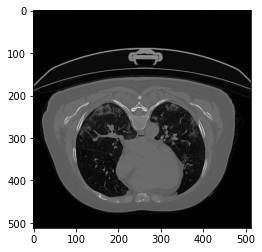

In [4]:
# Visualização da imagem
plt.imshow(img, cmap='gray')

#### Aplicação da Nitidez

In [5]:
def unsharp_mask(image, kernel_size=(1, 1), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

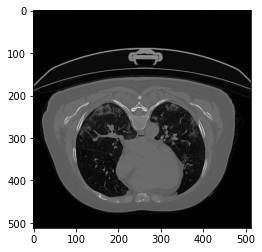

In [7]:
img_nitida = unsharp_mask(img)
plt.imshow(img_nitida, cmap='gray')

#### Alongamento de contraste de histograma

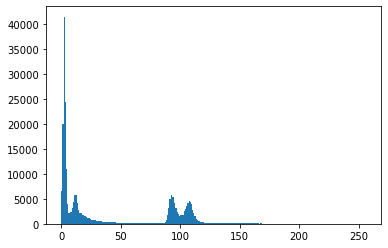

In [16]:
# Histograma original
plt.hist(img_nitida.ravel(),256,[0,256]) 
plt.show() 

O histograma de uma imagem descreve a distribuição estatística dos níveis de cinza em termos do número de amostras ("pixels") com cada nível.

In [17]:
# Aplicação do alongamento

mean = img.mean()
# Se a media dos pixels for maior que 160 então
if mean > 165:
    # Equalização de histograma contrast stretching
    p2, p98 = np.percentile(img_nitida, (2, 98))
    imgex = exposure.rescale_intensity(img_nitida, in_range=(p2, p98))
else:
    # Equalização de histograma contrast stretching
    p2, p98 = np.percentile(img_nitida, (25, 98))
    imgex = exposure.rescale_intensity(img_nitida, in_range=(p2, p98))   

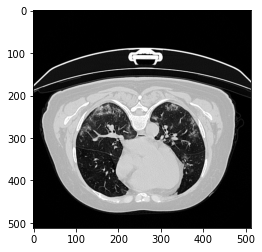

In [18]:
plt.imshow(imgex, cmap='gray')

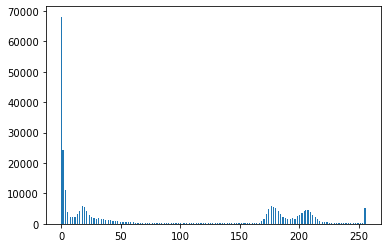

In [20]:
# Histograma após o alongamento
plt.hist(imgex.ravel(),256,[0,256]) 
plt.show() 

#### Aplicação do Threshold Otsu

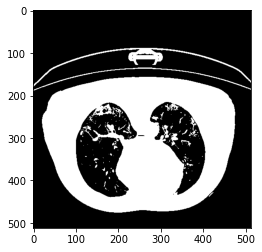

In [25]:
# Threshold Otsu
otsu = threshold_otsu(imgex)
binary1 = imgex < otsu

# Inversão de fundo
img_in = 1 - binary1

plt.imshow(img_in, cmap='gray')

#### Aplicação de Erosão

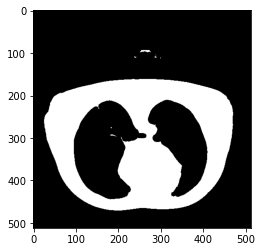

In [26]:
# Erosão
selem = disk(5)
eroded = erosion(img_in, selem) 

plt.imshow(eroded, cmap='gray')

#### Aplicação do Convex Hull

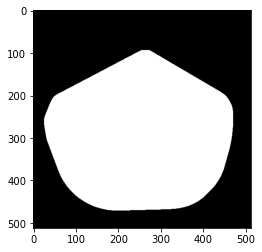

In [27]:
# Convex Hull
hull1 = convex_hull_image(eroded)

plt.imshow(hull1, cmap='gray')

#### Área de Interesse

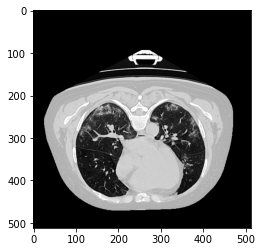

In [28]:
# Área contendo os pulmões
areapul = imgex*hull1

plt.imshow(areapul, cmap='gray')

#### Função Para Remoção de Pequenas Regiões

In [48]:
# Função para verificar se a imagem ainda possui pequenas regiões, e com isso remove-las 

def remove(img):
    img_pos = img
    # Imagem binaria
    otsu = threshold_otsu(img)
    binary1 = img < otsu
    # Inversão de fundo
    img_in = 1 - binary1

    number_of_pixels1 = 10000 # As regioes que tiverem menos de 10000 pixels serão removidas

    label_objects1, nb_labels1 = ndi.label(img_in) # Criando labels com as diferentes regiões da imagem

    if nb_labels1 > 1:
        new_image1 = np.zeros((label_objects1.shape[0],label_objects1.shape[1])) #Criando a nova imagem que receberá o resultado
        for i in range(1,nb_labels1):
            quant1 = np.sum(label_objects1[:] == i) # Calculando o número de pixels da região de label i
            if(quant1 > number_of_pixels1): # Fazendo a limiarização para remover as regiões com menos pixels que a variável
                new_image1[label_objects1[:] == i] = 1 # Os pixels da nova imagem receberão valor 1 nas posições que a região possui label igual a i
                    
        if new_image1.mean() == 0.0:
            new_image1 = img_in
            # Erosão
            selem = disk(5)
            eroded = erosion(new_image1, selem)   
            imagens_part2 = eroded
                
        else:
            imagens_part2 = new_image1
            
    else:
        imagens_part2 = img_in
        
    return imagens_part2

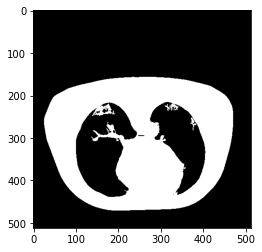

In [49]:
imgfinal = remove(areapul)

plt.imshow(imgfinal, cmap='gray')

#### Área de Interesse Final

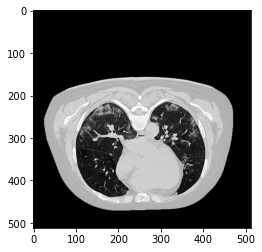

In [50]:
# Aplicação do Convex Hull
hull_pos = convex_hull_image(imgfinal)

# Área de Interesse
area2pul = areapul*hull_pos

# Visualização
plt.imshow(area2pul, cmap='gray')

## Inteligência Artificial

A Inteligência Artificial (IA), está cada vez mais presente em nossos ambientes pessoais e de trabalho. As aplicações de IA usadas todos os dias incluem assistentes pessoais alimentados por voz, algoritmos comportamentais aplicados a conversas telefônicas em tempo real, recomendações de compras alimentadas por análises preditivas e veículos autônomos.

A IA envolve várias tecnologias, como o aprendizado de máquina, aprendizado profundo, entre outros que conseguem simular a capacidades que os seres humanos possuem.

Com isso, o aprendizado de máquina é uma subárea da IA capaz de analisar dados, identificando seus padrões e conseguindo tomar decisões com o mínimo de intervenção humana. Dentro dessa área é possível encontrar um vasto número de técnicas, algoritmos e metodologias.

Por fim, temos o aprendizado profundo, sub área do aprendizado de máquina, responsável por algoritmos capazes de realizar tarefas complexas, assim como os seres humanos, uma dessas tarefas é a identificação de imagens. O aprendizado profundo permite também que os modelos computacionais compostos por múltiplas camadas de processamento aprendam representações de dados com múltiplos níveis de abstração e é evidenciado que esses métodos melhoraram drasticamente o estado da arte no reconhecimento da fala, reconhecimento visual de objetos, e muitos outros domínios, como descoberta de remédios.

Na figura abaixo, temos a representação do domínio da inteligência artificial, suas subáreas e suas características principais.

![title](imagens/ia.png)

### Classificação

Para a tarefa de classificação em imagens, a literatura mostra que o uso do aprendizado profundo está sempre presente, com isso as redes neurais convolucionais (CNN) são utilizadas. Esse tipo de rede possui uma arquitetura profunda e hierárquica.

As CNNs são responsáveis por extrair as características das imagens usando suas camadas de convoluções e representá-las como informações, essas camadas compostas por convoluções são formadas a partir de um conjunto de filtros, que durante o processo de treinamento os valores desses filtros são ajustados para que sejam ativados na presença de características importantes. Nessa etapa é realizada a convolução entre os filtros convolucionais e o volume de entrada, em seguida os valores resultantes passam por uma função de ativação.

Na animação abaixo, você pode ver a operação de convolução. Você pode ver o filtro (o quadrado verde) deslizando sobre nossa entrada (o quadrado azul) e o resultado da convolução entra no Mapa de Recursos (o quadrado vermelho).

A área do nosso filtro tem o tamanho de 3x3.

![title](imagens/convnet5.gif)

As informações que foram extraídas pelas camadas convolucionais passam pela camada Pooling, que é responsável por reduzir a dimensionalidade do atributo envolvido. Com isso, é possível diminuir o custo computacional necessário para processar os dados. Além disso, é útil para extrair características dominantes das imagens. Por fim, a saída das camadas convolucionais e de Pooling representam as características extraídos das imagens de entrada, e as camadas totalmente conectadas usam essas características para classificar as imagens em uma classe pré-determinada.

Na figura abaixo, temos a representação da etapa de Pooling, nela é possível observar o Max Pooling e Average Pooling, ambos são um tipo de redução de dimensionalidade, porém suas utilidades são diferentes. O Max Pooling mantém as características mais proeminentes do mapa de características selecionando o valor máximo do pixel do lote, enquanto o Average Pooling mantém os valores médios de características do mapa de recursos, selecionando.

![title](imagens/pooling.png)

O pooling é uma maneira de capturar imagens grandes e reduzi-las enquanto preserva as informações mais importantes.


Na figura abaixo, temos a etapa de extração dos recursos de aprendizagem, definida pelas camadas de convoluções e pooling e temos a etapa de classificação, definida pelas camadas totalmente conectadas.

![title](imagens/deep.png)

#### Treinamento de uma Rede Neural

Após entendermos como funciona a estrutura de uma rede neural convolucional, temos então as etapas de treinamento de um modelo:

- Primeira etapa: A rede neural convolucional começa com todos os filtros e pesos inicializados de forma aleatória.

- Segunda etapa: A rede recebe as imagens de treinamento como entrada e realiza o processo de propagação, com isso são obtidos valores de probabilidade da imagem pertencer a uma determinada classe.

- Terceira etapa: O valor do erro total obtido na camada de saída é calculado.

- Quarta etapa: O algoritmo do backpropagation é utilizado para calcular os valores do gradiente do erro, em seguida os valores dos filtros e pesos são atualizados e ajustados na proporção que eles contribuíram para o erro total.

- Quinta etapa: Ocorre a repetição da segunda e quarta etapa, para todas as imagens do conjunto de treinamento.

Com isso, o erro obtido pela rede é menor a cada vez que uma mesma imagem passa pela rede, demonstrando então que a rede está aprendendo a classificar corretamente as imagens de treinamento. Com um conjunto de treinamento abundante e variado o suficiente, a rede apresentará capacidade de generalização e conseguirá classificar corretamente novas imagens que não estavam presentes no processo de treinamento.

#### LeNet-5

Para a tarefa de classificação duas redes foram escolhidas, sendo elas a LeNet-5 e a VGG-19, esses modelos foram selecionados após revisões de literatura, que mostram que mesmo possuindo arquiteturas mais simples possuem bons resultados. A LeNet-5 foi uma das primeiras redes neurais convolucionais e teve um grande papel para a propagação do aprendizado profundo. Essa arquitetura foi utilizada para reconhecer caracteres escritos à mão e impressos por máquinas.

Na figura abaixo, temos a representação da arquitetura da LeNet-5, podemos observar suas etapas de convoluções, Pooling e totalmente conectadas, assim como seus valores originais propostos pelos autores.

![title](imagens/lenet.png)

#### VGG-19

Outro modelo para classificação utilizado é a VGG-19, esse modelo é escolhido após análises da literatura, onde muitos trabalhos atingem resultados promissores com essa rede, além da VGG-19 possuir uma estrutura mais simples, de fácil compreensão, comparadas com outras redes pré-treinadas. A VGG-19 possui 19 camadas treináveis, divididas em cinco blocos e três camadas totalmente conectadas. Existe uma camada MaxPooling entre dois blocos convolucionais, duas camadas totalmente conectadas com 4096 unidades e uma camada de saída com a função de ativação softmax. A rede VGG-19 possui 143 milhões de parâmetros.

Na figura abaixo, temos a representação da arquitetura da VGG-19, podemos observar suas camadas convolucionais, filtros, Pooling e as camadas totalmente conectadas, assim como seus valores originais dos parâmetros.

![title](imagens/vgg19.png)

## Experimentos Classificação

Para avaliar a metodologia proposta, são utilizados alguns experimentos difundidos na literatura.

- Experimento 1: Consiste na divisão das bases de imagens entre treinamento, validação e teste. Para a tarefa de classificação, usamos o Dataset 2, devido a esse dataset ser muito grande, e haver limitações de hardware, separamos amostras de forma aleatória para cada conjunto de dados presente nesse dataset, por fim para tarefa de classificação, são utilizadas 9,000 imagens para treinamento, sendo 4,500 imagens para cada classe: COVID-19, Normal. Para a validação temos 2,250 imagens, sendo 1,125 imagens para cada classe e para o teste do modelo temos um total de 2,600 imagens, 1,300 imagens para cada classe.


- Experimento 2: Para o segundo experimento, adicionamos mais uma classe, para observar como o modelo irá se comportar, então para esse experimento são utilizadas 13,500 imagens para treinamento, sendo 4,500 imagens para cada classe, COVID-19, Normal, Pneumonia. Para a validação temos 3,375 imagens, sendo 1,125 imagens para cada classe e para o teste do modelo temos um total de 3,900 imagens, 1,300 imagens para cada classe.

Para avaliar os resultados de cada experimento são utilizadas algumas métricas que são amplamente difundidas nos trabalhos do estado da arte, onde estão presente em quase todos os trabalhos pesquisados, temos então as seguintes métricas: Acurácia; Kappa; Precisão; Especificidade; Sensibilidade, F1-Score e Auc.

### Avaliação dos resultados

Para avaliar os resultados de cada experimento são utilizadas algumas métricas que são amplamente difundidas nos trabalhos do estado da arte, onde estão presente em quase todos os trabalhos pesquisados, temos então as seguintes métricas: Acurácia; Kappa; Precisão; Especificidade; Sensibilidade, F1-Score e Auc. 

Para calcular essas métricas é necessário utilizar uma matriz de confusão, com isso é possível analisar as previsões feitas pelo modelo, e com essa matriz, podemos extrair as informações como:

Verdadeiros Positivos (VP), quando o modelo prever que aquela imagem é de uma determinada classe e essa imagem realmente é dessa classe.

Verdadeiros Negativos (VN), quando o modelo prever que a imagem é classificada como não pertencente a uma classe e ela não é dessa classe.

Falso Positivos (FP), quando o modelo classifica uma imagem não pertencente a uma determinada classe mas ela pertence a essa classe.

Falso Negativo (FN), quando o modelo classifica uma imagem pertencente a uma classe, mas ela não é dessa classe. Então podemos calcular as demais métricas, abaixo podemos visualizar sua equação e seu conceito.

Na figura abaixo, podemos visualizar um exemplo da matriz de confusão.

![title](imagens/matrzi.png)

Com essas informações é possível calcular as métricas:

Acurácia: é a média global dos acertos para o modelo ao classificar as classes.

Kappa: a acurácia pode não ser uma boa métrica de avaliação para dados que possam conter classes com quantidade de amostras desbalanceados, então para resolver isso podemos utilizar a métrica Kappa.

Precisão: essa métrica verifica quantas observações o modelo classificou de forma correta como pertencente a uma classe. Ou seja, de todas as imagens que o modelo previu como COVID-19, quantas realmente possuem COVID-19.

F1-Score: a métrica F1-Score é a média harmônica entre as métricas, Recall e Precisão, ou seja, ela resume as informações dessas duas métricas.

Especificidade: a especificidade avalia a capacidade do modelo de classificar resultados negativos.

Sensibilidade: essa métrica avalia a capacidade do modelo de classificar com sucesso resultados classificados como positivos.

Auc: a curva ROC pode ser avaliada pela métrica AUC, essa métrica indica a probabilidade de duas previsões serem corretamente ranqueadas. A AUC será um valor entre 0 e 1. Quanto maior esse valor, melhor a capacidade do modelo em separar classes.

#### Implementação da arquitetura LeNet-5 proposta

Para o primeiro modelo implementado, é utilizado a estrutura da LeNet-5 como base, camadas convolucionais e totalmente conectadas são adicionadas e modificadas, assim como seus hiper-parâmetros, ao fim temos um modelo baseado na LeNet-5 com três blocos, o primeiro bloco consiste em duas camadas convolucionais com 8 filtros de características cada e uma camada de MaxPooling, o segundo bloco possui 4 camadas convolucionais com 16 filtros de características, seguida de MaxPooling e por fim o terceiro bloco possui 4 camadas convolucionais com 32 filtros de características seguida de MaxPooling. 

O tamanho de entrada dessa arquitetura são imagens de $256\times256$. Na figura abaixo, podemos observar a arquitetura proposta.

![title](imagens/lenetours.png)

#### Pacotes

In [2]:
# Importações 

# Importações para manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Importações para manipulação de imagens
import os
import cv2
import itertools
import shutil
import imageio
import skimage
import skimage.io
import skimage.transform
from pathlib import Path

# Importações para Aprendizado Profundo
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from keras.applications import VGG19
from tensorflow.keras.metrics import binary_accuracy

# Importações para cálculo de métricas e outras tarefas
import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

%matplotlib inline

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Mini Curso 6" --iversions

Author: Mini Curso 6

numpy     : 1.19.5
pandas    : 1.3.4
matplotlib: 3.5.1
cv2       : 4.2.0
imageio   : 2.9.0
tensorflow: 2.4.1
skimage   : 0.19.2
keras     : 2.3.1
sys       : 3.7.13 (default, Mar 29 2022, 02:18:16) 
[GCC 7.5.0]
sklearn   : 1.0.2



In [7]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.13


#### Utilização de GPU

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

tf_device='/gpu:0'

#### Diretórios 

In [5]:
dados_treino = 'exp2/Dataset/Treino/'
dados_val = 'exp2/Dataset/Validacao/'
dados_test = 'exp2/Dataset/Teste/'

In [30]:
# Aqui geramos os batches de dados
datagen = ImageDataGenerator(rescale = 1.0/255)

# Gera os batches de treino
gen_treino = datagen.flow_from_directory(dados_treino,
                                         target_size = (256,256),
                                         batch_size = 8,
                                         color_mode = "grayscale",
                                         class_mode = 'categorical')

# Gera os batches de validação
gen_val = datagen.flow_from_directory(dados_val,
                                      target_size = (256,256),
                                      batch_size = 8,
                                      color_mode = "grayscale",
                                      class_mode = 'categorical')

# Gera os batches de teste
# Nota: shuffle = False faz com que o conjunto de dados de teste não seja "embaralhado"
gen_teste = datagen.flow_from_directory(dados_test,
                                        target_size = (256,256),
                                        batch_size = 1,
                                        color_mode = "grayscale",
                                        class_mode = 'categorical',
                                        shuffle = False)

Found 13500 images belonging to 3 classes.
Found 3375 images belonging to 3 classes.
Found 3900 images belonging to 3 classes.


In [16]:
# Aqui definimos o número de passos
passos_treino = np.ceil(13500/8)
passos_val = np.ceil(3375/8)

print('Quantidas de passos por épocas em treinamento:', passos_treino)
print('Quantidas de passos por épocas em validação:', passos_val)

Quantidas de passos por épocas em treinamento: 1688.0
Quantidas de passos por épocas em validação: 422.0


#### Hiperparâmetros

In [15]:
# Tamanho do kernel
kernel_size = (3,3) # Convolução

# Tamanho do Pool
pool_size = (3,3) # Pooling

# Número de neurônios da primeira camada
num_neurons_1 = 8

# Número de neurônios da segunda camada
num_neurons_2 = 16

# Número de neurônios da terceira camada
num_neurons_3 = 32

# Taxa de dropout nas camadas de convolução
#dropout_conv = 0.4

# Taxa de dropout na camada densa
dropout_dense = 0.4

# Taxa de aprendizado
taxa_aprendizado = 0.00001

# Número de épocas de treinamento
num_epochs = 100

#### Arquitetura

In [16]:
# Arquitetura do Modelo

# Cria a sequência de camadas
model = Sequential()

# Adicionamos a primeira camada convolucional com 2 operações de convolução
model.add(Conv2D(num_neurons_1, kernel_size, activation = 'relu', input_shape = (256, 256, 1)))
model.add(Conv2D(num_neurons_1, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 

# Adicionamos a segunda camada convolucional com 4 operações de convolução
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_2, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size))

# Adicionamos a terceira camada convolucional com 4 operações de convolução
model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
model.add(Conv2D(num_neurons_3, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size))

# Camada de "achatamento"
model.add(Flatten())
model.add(Dropout(dropout_dense))

# Camada densa com dropout
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(dropout_dense))

# Camada densa com dropout
model.add(Dense(16, activation = "relu"))
#model.add(Dropout(dropout_dense))

# Camada densa com dropout
model.add(Dense(8, activation = "relu"))
#model.add(Dropout(dropout_dense))

# Camada de saída
model.add(Dense(3, activation = "softmax"))

# Sumário do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 254, 254, 8)       80        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 252, 252, 8)       584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 84, 84, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 82, 82, 16)        1168      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 80, 80, 16)        2320      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 78, 78, 16)        2320      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 76, 76, 16)       

#### Compilação

In [17]:
# Compilação do modelo
model.compile(Adam(taxa_aprendizado), loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### Callbacks

In [18]:
# Definimos um checkpoint para verificar regularmente se a perda em validação diminuiu
# Se a performance melhorar em validação salvamos o modelo
# Podemos ainda optar por salvar o modelo a cada número de épocas
# Redução gradual da taxa de aprendizado (Reduce on Plateau)
callbacks = [#EarlyStopping(monitor = 'val_loss', patience = 15, verbose = 1),
             ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 7, min_lr = 0.000001, verbose = 1),
             ModelCheckpoint('modelos/modeloExp2N.h5', 
                             verbose = 1, 
                             save_best_only = True, 
                             save_weights_only = True)]

#### Treinamento do Modelo

In [19]:
# Treinamento do modelo
history = model.fit(gen_treino, 
                    steps_per_epoch = passos_treino, 
                    validation_data = gen_val,
                    validation_steps = passos_val,
                    epochs = num_epochs, 
                    verbose = 1,
                    callbacks = callbacks)

2022-06-07 22:59:03.063239: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-07 22:59:03.083363: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3492935000 Hz


Epoch 1/100


2022-06-07 22:59:03.585830: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-06-07 22:59:03.761696: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-06-07 22:59:04.522515: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-06-07 22:59:04.562207: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1688/1688 [==============================] - 85s 41ms/step - loss: 1.0984 - accuracy: 0.3498 - val_loss: 1.0967 - val_accuracy: 0.3668

Epoch 00001: val_loss improved from inf to 1.09668, saving model to modelos/modeloExp2N.h5
Epoch 2/100
1688/1688 [==============================] - 49s 29ms/step - loss: 1.0853 - accuracy: 0.3967 - val_loss: 0.9640 - val_accuracy: 0.4844

Epoch 00002: val_loss improved from 1.09668 to 0.96398, saving model to modelos/modeloExp2N.h5
Epoch 3/100
1688/1688 [==============================] - 49s 29ms/step - loss: 0.9143 - accuracy: 0.5658 - val_loss: 0.9489 - val_accuracy: 0.4957

Epoch 00003: val_loss improved from 0.96398 to 0.94893, saving model to modelos/modeloExp2N.h5
Epoch 4/100
1688/1688 [==============================] - 49s 29ms/step - loss: 0.8531 - accuracy: 0.6056 - val_loss: 0.9609 - val_accuracy: 0.4883

Epoch 00004: val_loss did not improve from 0.94893
Epoch 5/100
1688/1688 [==============================] - 49s 29ms/step - loss: 0.8262 - 

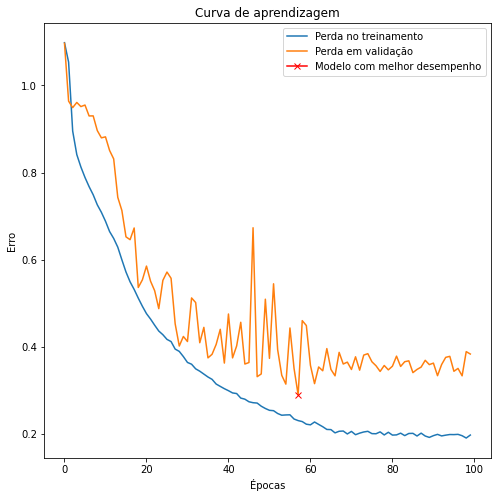

In [20]:
# Resultado do Treinamento
plt.figure(figsize = (8, 8))
plt.title("Curva de aprendizagem")
plt.plot(history.history["loss"], label = "Perda no treinamento")
plt.plot(history.history["val_loss"], label = "Perda em validação")
plt.plot(np.argmin(history.history["val_loss"]), 
         np.min(history.history["val_loss"]), 
         marker ="x", 
         color = "r", 
         label = "Modelo com melhor desempenho")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.legend();

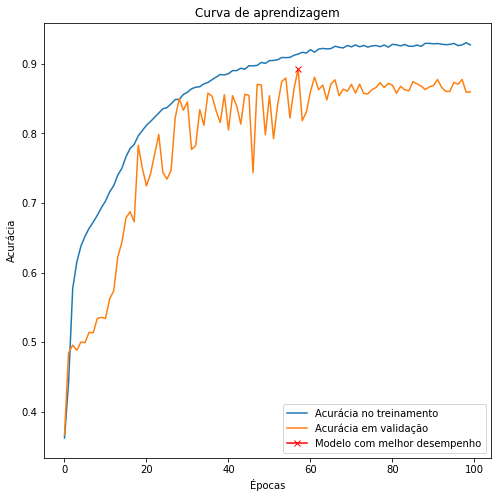

In [21]:
# Resultado do Treinamento
plt.figure(figsize = (8, 8))
plt.title("Curva de aprendizagem")
plt.plot(history.history["accuracy"], label = "Acurácia no treinamento")
plt.plot(history.history["val_accuracy"], label = "Acurácia em validação")
plt.plot(np.argmax(history.history["val_accuracy"]), 
         np.max(history.history["val_accuracy"]), 
         marker ="x", 
         color = "r", 
         label = "Modelo com melhor desempenho")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend();

#### Avaliação do modelo nos dados de teste

In [36]:
model.load_weights('modelos/modeloExp2N.h5')

In [37]:
model.evaluate(gen_teste)

3900/3900 [==============================] - 17s 4ms/step - loss: 0.1422 - accuracy: 0.9528


[0.14224649965763092, 0.9528205394744873]

In [38]:
# Vamos obter os labels dos dados de teste
labels_teste = gen_teste.classes

In [39]:
# Precisamos dos labels para o plot da matriz de confusão
labels_teste.shape

(3900,)

In [40]:
# Imprimimos a etiqueta (label) associada a cada classe
gen_teste.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [41]:
# Fazemos as previsões
previsoes = model.predict(gen_teste, steps = 3900, verbose = 1)

3900/3900 [==============================] - 15s 4ms/step


In [42]:
# Shape das previsões
previsoes.shape

(3900, 3)

In [43]:
# Função para a Matriz de Confusão
def plot_confusion_matrix(cm, 
                          classes,
                          normalize = False,
                          title = 'Matriz de Confusão',
                          cmap = plt.cm.Blues):

    # Se normalize = True, obtemos a matriz de confusão com dados normalizados
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão Sem Normalização')

    # Mostramos a Matriz de Confusão
    #print(cm)

    # Plot
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Plot do texto
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.ylabel('Label Verdadeiro')
    plt.xlabel('Label Previsto')
    plt.tight_layout()

In [44]:
# A função argmax() retorna o índice do valor máximo em uma linha
matriz_conf = confusion_matrix(labels_teste, previsoes.argmax(axis = 1))

In [45]:
# Labels dos dados de teste
gen_teste.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [46]:
# Definimos os rótulos dos labels da classe. Eles precisam corresponder a ordem mostrada acima.
matriz_conf_plot_labels = ['Covid', 'Normal', 'Pneumonia']

Matriz de Confusão Sem Normalização


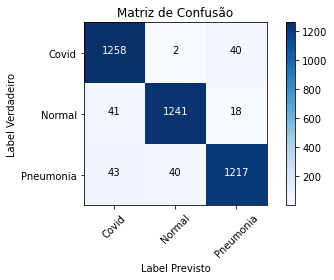

In [47]:
# E então criamos o plot
plot_confusion_matrix(matriz_conf, matriz_conf_plot_labels, title = 'Matriz de Confusão')

#### Relatório de Classificação

In [48]:
# Geramos a sequência na qual o gerador processou as imagens de teste
imagens_teste = gen_teste.filenames

In [49]:
# Obtemos os rótulos verdadeiros
y_true = gen_teste.classes

In [50]:
# Obtemos os rótulos previstos
y_pred = previsoes.argmax(axis=1)

In [3]:
from sklearn.metrics import classification_report

In [53]:
# Gera o relatório de classificação
report = classification_report(y_true, y_pred, target_names = matriz_conf_plot_labels)
print(report)

              precision    recall  f1-score   support

       Covid       0.94      0.97      0.95      1300
      Normal       0.97      0.95      0.96      1300
   Pneumonia       0.95      0.94      0.95      1300

    accuracy                           0.95      3900
   macro avg       0.95      0.95      0.95      3900
weighted avg       0.95      0.95      0.95      3900



In [54]:
# Cutoff
y_true = (y_true > 0.5).flatten()
y_pred = (y_pred > 0.5).flatten()

cm = confusion_matrix(y_true,y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = (1.0 * (tn + tp)) / (tn + fp + tp + fn)
kappa = (2 * (tp * tn - fn * fp) / (tp * fn + tp * fp + 2 * tp * tn + fn^2 + fn * fn + fp^2 + fp * tn))
prec = float(tp)/float(tp + fp)
fscore = float(2*tp)/float(2*tp + fp + fn)
specificity = (1.0 * tn) / (tn + fp)
sensitivity = (1.0 * tp) / (tp + fn)
auc = 1 - 0.5 * (((1.0 * fp) / (fp + tn)) + ((1.0 * fn) / (fn + tp)))

# Print
print("accuracy: {0:.2f}\n".format(accuracy))
print("kappa: {0:.2f}\n".format(kappa))
print("prec: {0:.2f}\n".format(prec))
print("fscore: {0:.2f}\n".format(fscore))
print("specificity: {0:.2f}\n".format(specificity))
print("sensitivity: {0:.2f}\n".format(sensitivity))
print("auc: {0:.2f}\n".format(auc))

print('-'*55,'\n')

accuracy: 0.97

kappa: 0.95

prec: 0.98

fscore: 0.98

specificity: 0.97

sensitivity: 0.97

auc: 0.97

------------------------------------------------------- 



#### Implementação da arquitetura VGG-19 proposta

Para a VGG-19 implementada nesse capítulo, a arquitetura é carregada sem as camadas densas. A entrada da arquitetura também é modificada para que seja possível trabalhar com imagens de dimensões ($256\times256$), então os pesos da rede que foi treinada com a base de dados da ImageNet são utilizados nas camadas convolucionais para iniciar o treinamento. A técnica de transferência de aprendizagem é utilizada nesse trabalho para evitar uma necessidade de treinamentos com longas durações necessários para treinar um modelo do zero.

Após a configuração das camadas convolucionais, uma camada global average pooling2D é adicionada ao final da etapa de extração de características. Após essa camada é adicionado um dropout com 0,4, para evitar que o modelo se adapte de mais aos dados de treinamento Então novas camadas totalmente conectadas são adicionadas ao modelo. Como essa arquitetura gera muitas informações, uma camada com apenas 8 neurônios são adicionadas na primeira camada densa, seguida pela camada densa de saída com 3 neurônios. Na camada densa é utilizada a função de ativação ReLu e na camada densa de saída a softmax é utilizada.

Na figura abaixo, vemos a representação dessa arquitetura modificada.

![title](imagens/vgg19m.png)

In [17]:
# Aqui geramos os batches de dados
datagen = ImageDataGenerator(rescale = 1.0/255)

# Gera os batches de treino
gen_treino = datagen.flow_from_directory(dados_treino,
                                         target_size = (256,256),
                                         batch_size = 8,
                                         class_mode = 'categorical')

# Gera os batches de validação
gen_val = datagen.flow_from_directory(dados_val,
                                      target_size = (256,256),
                                      batch_size = 8,
                                      class_mode = 'categorical')

# Gera os batches de teste
# Nota: shuffle = False faz com que o conjunto de dados de teste não seja "embaralhado"
gen_teste = datagen.flow_from_directory(dados_test,
                                        target_size = (256,256),
                                        batch_size = 1,
                                        class_mode = 'categorical',
                                        shuffle = False)

Found 13500 images belonging to 3 classes.
Found 3375 images belonging to 3 classes.
Found 3900 images belonging to 3 classes.


#### Arquitetura

In [18]:
# Criamos o modelo base
modelo_base = tf.keras.applications.vgg19.VGG19(weights = 'imagenet', 
                                                include_top = False, 
                                                input_shape = (256,256,3))

In [19]:
# Sumário do modelo base
modelo_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [20]:
# Adicionamos nossas camadas ao modelo_base

# Cria a sequência de camadas
add_model = Sequential()

# Adiciona primeiro o modelo base
add_model.add(modelo_base)

# Precisamos de uma camada global de Pooling
add_model.add(GlobalAveragePooling2D())

# Dropout para regularização e evitar overfitting
add_model.add(Dropout(0.4))

# 1º Camada densa
add_model.add(Dense(8, activation = 'relu'))

# Camada de saida com ativação softmax para previsão das probabilidades das classes
add_model.add(Dense(3, activation = 'softmax'))

In [21]:
# Cria o modelo final
modelo_final = add_model

In [22]:
# Sumário do modelo final
modelo_final.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 4104      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 20,028,515
Trainable params: 20,028,515
Non-trainable params: 0
_________________________________________________________________


#### Compilação

In [23]:
# Cria o otimizador
otimizador = Adam(lr = 0.0000001)

# Compila o modelo com o otimizador, função de custo e métricas que serão extraídas no treinamento
modelo_final.compile(optimizer = otimizador, 
                     loss = "categorical_crossentropy", 
                     metrics = ["accuracy"])

#### Callbacks

In [24]:
# Definimos um checkpoint para verificar regularmente se a perda em validação diminuiu
# Se a performance melhorar em validação salvamos o modelo
# Podemos ainda optar por salvar o modelo a cada número de épocas
# Redução gradual da taxa de aprendizado (Reduce on Plateau)
callbacks = [#EarlyStopping(monitor = 'val_loss', patience = 15, verbose = 1),
             ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 7, min_lr = 0.00000001, verbose = 1),
             ModelCheckpoint('modelos/VGG19Exp2N.h5', 
                             verbose = 1, 
                             save_best_only = True, 
                             save_weights_only = True)]

#### Treinamento

In [25]:
# Treinamento do modelo
history = modelo_final.fit(gen_treino, 
                    steps_per_epoch = passos_treino, 
                    validation_data = gen_val,
                    validation_steps = passos_val,
                    epochs = 100, 
                    verbose = 1,
                    callbacks = callbacks)

2022-06-08 13:53:27.112946: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-08 13:53:27.131404: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3492935000 Hz


Epoch 1/100


2022-06-08 13:53:27.742277: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-06-08 13:53:27.909507: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-06-08 13:53:28.672305: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-06-08 13:53:28.712467: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1688/1688 [==============================] - 173s 95ms/step - loss: 1.2926 - accuracy: 0.3199 - val_loss: 1.0953 - val_accuracy: 0.3470

Epoch 00001: val_loss improved from inf to 1.09534, saving model to modelos/VGG19Exp2N.h5
Epoch 2/100
1688/1688 [==============================] - 144s 85ms/step - loss: 1.1100 - accuracy: 0.3476 - val_loss: 1.0931 - val_accuracy: 0.3508

Epoch 00002: val_loss improved from 1.09534 to 1.09308, saving model to modelos/VGG19Exp2N.h5
Epoch 3/100
1688/1688 [==============================] - 144s 85ms/step - loss: 1.0882 - accuracy: 0.3735 - val_loss: 1.0864 - val_accuracy: 0.3609

Epoch 00003: val_loss improved from 1.09308 to 1.08639, saving model to modelos/VGG19Exp2N.h5
Epoch 4/100
1688/1688 [==============================] - 144s 85ms/step - loss: 1.0466 - accuracy: 0.4220 - val_loss: 1.0016 - val_accuracy: 0.5719

Epoch 00004: val_loss improved from 1.08639 to 1.00160, saving model to modelos/VGG19Exp2N.h5
Epoch 5/100
1688/1688 [=====================

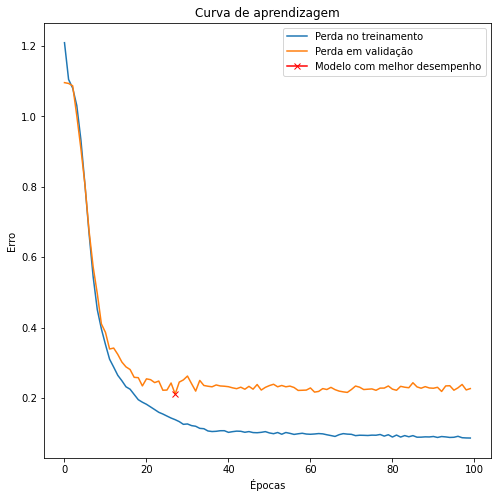

In [26]:
# Resultado do Treinamento
plt.figure(figsize = (8, 8))
plt.title("Curva de aprendizagem")
plt.plot(history.history["loss"], label = "Perda no treinamento")
plt.plot(history.history["val_loss"], label = "Perda em validação")
plt.plot(np.argmin(history.history["val_loss"]), 
         np.min(history.history["val_loss"]), 
         marker ="x", 
         color = "r", 
         label = "Modelo com melhor desempenho")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.legend();

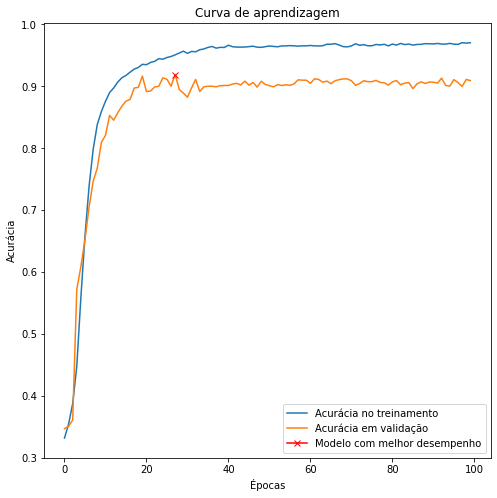

In [27]:
# Resultado do Treinamento
plt.figure(figsize = (8, 8))
plt.title("Curva de aprendizagem")
plt.plot(history.history["accuracy"], label = "Acurácia no treinamento")
plt.plot(history.history["val_accuracy"], label = "Acurácia em validação")
plt.plot(np.argmax(history.history["val_accuracy"]), 
         np.max(history.history["val_accuracy"]), 
         marker ="x", 
         color = "r", 
         label = "Modelo com melhor desempenho")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend();

#### Avaliação do modelo nos dados de teste

In [28]:
modelo_final.load_weights('modelos/VGG19Exp2N.h5')

In [29]:
modelo_final.evaluate(gen_teste)

3900/3900 [==============================] - 29s 6ms/step - loss: 0.0434 - accuracy: 0.9903


[0.043406423181295395, 0.9902564287185669]

In [30]:
# Vamos obter os labels dos dados de teste
labels_teste = gen_teste.classes

In [31]:
# Precisamos dos labels para o plot da matriz de confusão
labels_teste.shape

(3900,)

In [32]:
# Imprimimos a etiqueta (label) associada a cada classe
gen_teste.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [33]:
# Fazemos as previsões
previsoes = modelo_final.predict(gen_teste, steps = 3900, verbose = 1)

3900/3900 [==============================] - 20s 5ms/step


In [34]:
# Shape das previsões
previsoes.shape

(3900, 3)

In [35]:
# Função para a Matriz de Confusão
def plot_confusion_matrix(cm, 
                          classes,
                          normalize = False,
                          title = 'Matriz de Confusão',
                          cmap = plt.cm.Blues):

    # Se normalize = True, obtemos a matriz de confusão com dados normalizados
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão Sem Normalização')

    # Mostramos a Matriz de Confusão
    #print(cm)

    # Plot
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Plot do texto
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.ylabel('Label Verdadeiro')
    plt.xlabel('Label Previsto')
    plt.tight_layout()

In [36]:
# A função argmax() retorna o índice do valor máximo em uma linha
matriz_conf = confusion_matrix(labels_teste, previsoes.argmax(axis = 1))

In [37]:
# Labels dos dados de teste
gen_teste.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [38]:
# Definimos os rótulos dos labels da classe. Eles precisam corresponder a ordem mostrada acima.
matriz_conf_plot_labels = ['Covid', 'Normal', 'Pneumonia']

Matriz de Confusão Sem Normalização


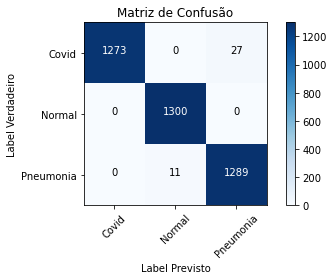

In [39]:
# E então criamos o plot
plot_confusion_matrix(matriz_conf, matriz_conf_plot_labels, title = 'Matriz de Confusão')

#### Relatório de Classificação

In [40]:
# Geramos a sequência na qual o gerador processou as imagens de teste
imagens_teste = gen_teste.filenames

In [41]:
# Obtemos os rótulos verdadeiros
y_true = gen_teste.classes

In [42]:
# Obtemos os rótulos previstos
y_pred = previsoes.argmax(axis=1)

In [43]:
# Gera o relatório de classificação
report = classification_report(y_true, y_pred, target_names = matriz_conf_plot_labels)
print(report)

              precision    recall  f1-score   support

       Covid       1.00      0.98      0.99      1300
      Normal       0.99      1.00      1.00      1300
   Pneumonia       0.98      0.99      0.99      1300

    accuracy                           0.99      3900
   macro avg       0.99      0.99      0.99      3900
weighted avg       0.99      0.99      0.99      3900



In [44]:
# Cutoff
y_true = (y_true > 0.5).flatten()
y_pred = (y_pred > 0.5).flatten()

cm = confusion_matrix(y_true,y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = (1.0 * (tn + tp)) / (tn + fp + tp + fn)
kappa = (2 * (tp * tn - fn * fp) / (tp * fn + tp * fp + 2 * tp * tn + fn^2 + fn * fn + fp^2 + fp * tn))
prec = float(tp)/float(tp + fp)
fscore = float(2*tp)/float(2*tp + fp + fn)
specificity = (1.0 * tn) / (tn + fp)
sensitivity = (1.0 * tp) / (tp + fn)
auc = 1 - 0.5 * (((1.0 * fp) / (fp + tn)) + ((1.0 * fn) / (fn + tp)))

# Print
print("accuracy: {0:.2f}\n".format(accuracy))
print("kappa: {0:.2f}\n".format(kappa))
print("prec: {0:.2f}\n".format(prec))
print("fscore: {0:.2f}\n".format(fscore))
print("specificity: {0:.2f}\n".format(specificity))
print("sensitivity: {0:.2f}\n".format(sensitivity))
print("auc: {0:.2f}\n".format(auc))

print('-'*55,'\n')


accuracy: 0.99

kappa: 0.98

prec: 0.99

fscore: 0.99

specificity: 0.98

sensitivity: 1.00

auc: 0.99

------------------------------------------------------- 



### Segmentação

Com a implementando a tarefa de classificação podemos obter bons resultados, porém é necessário considerar as necessidades que um especialista possui. Para o especialista é necessário a identificação das regiões de lesões e não apenas saber se um paciente possui ou não essa doença. Pensando nisso, o método de classificação pode não ser suficiente para colaborar de uma forma que possa sanar as necessidade desses especialistas. Assim, temos os métodos de segmentação, onde é possível marcar as lesões nas imagens de Tomografia de Tórax, possibilitando ao especialista uma análise e avaliação da gravidade da infecção nos pulmões dos pacientes. Essas informações contribuem não só para o diagnóstico, mas também para o acompanhamento dos pacientes.

#### U-NET

Com isso, temos a U-Net, uma rede com uma arquitetura de rede convolucional para segmentação de imagens, essa rede foi desenvolvida com um enfoque maior na segmentação de imagens biomédicas. Após analisar os trabalhos relatados na literatura, notamos uma tendência no uso de redes baseadas na U-Net. Essa técnica mostra excelentes resultados em diversos trabalhos. Na figura abaixo, podemos observar os resultados que podem ser obtidos utilizando essa rede.

Em (a), temos a imagem que ira servir de entrada para a rede, em (b), temos a imagem de saída da rede, essa imagem de saída é a região onde a rede detectou lesões, por fim, em (c), temos uma representação da união da imagem de saída com a imagem de entrada, onde podemos observar as regiões com lesões afetadas em destaque.

![title](imagens/unetex.png)

A arquitetura da U-Net consiste em um caminho de contração e um caminho expansivo. O caminho de contratação da arquitetura é um típico caminho de uma rede convolucional. Este caminho é composto por uma aplicação repetida de duas convoluções $3\times3$, cada uma seguida por uma função de ativação \textit{ReLU} e uma operação de max pooling $2\times2$ com duas etapas para downsampling. Em cada etapa de downsampling os números de filtros de características são dobrados.

Cada passo no caminho expansivo consiste em um upsampling dos filtros de características seguido de uma convolução $2\times2$ que reduz pela metade o número dos filtros de características, depois temos uma concatenação com o mapa de características correspondentemente cortado do caminho de contratação, e duas convoluções $3\times3$, cada uma seguida por uma função ReLU.

Na camada final, é utilizada uma convolução $1\times1$ para mapear todos os vetores de característica para o número desejado de classes. Na figura abaixo, podemos observa a arquitetura original proposta dessa rede, e seus caminhos de contração e expansão.

![title](imagens/unet.png)


## Experimentos Segmentação

Para avaliarmos o desempenho do modelo para a tarefa de segmentação, utilizamos o Dataset 1, fazendo uma divisão aleatória das imagens, onde é separado 20% das imagens desse dataset para o teste desse modelo, então as imagens restantes são divididas em 80% para Treinamento e 20% para validação, as imagens que estão presente em um desses conjuntos não se repetem em nenhum outro conjunto. Após essa divisão temos então, 2,252 imagens de treinamento, 564 imagens de validação e 704 imagens para teste. 

### Avaliação dos resultados

Para avaliar o desempenho do método proposto são utilizadas algumas métricas da tarefa de classificação, como a sensibilidade e a especificidade, e temos a adição de mais duas métricas, que são a Dice e IoU. Essas métricas são utilizadas especialmente para a tarefa de segmentação. Utilizamos também a Dice Loss que é a função de perda utilizada na U-Net proposta.

Podemos observar que assim como a tarefa de classificação também é utilizado as informações de VP, VN, FN e FP, porém a análise dessas informações na tarefa de segmentação é diferente, podemos observar como funciona na figura abaixo. 

![title](imagens/matrizseg.png)

Com essas informações podemos calcular as métricas a baixo:

Dice: é usada para quantificar o desempenho dos métodos de segmentação de imagens. O dice é uma estatística usada para medir a similaridade de duas amostras.

Dice Loss: utilizando o Dice para obter valores próximos a 1 para avaliar o quão a segmentação prevista é similar a segmentação verdadeira, utilizamos a função de perda Dice Loss para obter valores próximo a 0, fazendo com que o valor da perda caia quando o valor do dice subir. A tarefa de otimização dessa função de perda é essencial para obter um modelo generalista.

IoU: assim como o Dice a métrica IoU também é uma métrica para quantificar o desempenho dos métodos de segmentação. A IoU mede a semelhança entre conjuntos amostrais, e é definido como o tamanho da intersecção dividida pelo tamanho da união dos conjuntos amostrais.

#### Implementação da arquitetura U-NET proposta

Na figura abaixo temos a ilustração da arquitetura U-Net proposta

![title](imagens/unetours.png)

In [102]:
from tqdm import tqdm_notebook, tnrange
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
from tensorflow.keras.models import Model

from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, 
                                     BatchNormalization, Dropout, Lambda, average)
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
import random

#### Carregando Imagens e Máscaras

In [45]:
# Parâmetros para as matrizes de imagens
im_width = 512
im_height = 512
border = 5

#### Treinamento

In [48]:
# Lista a pasta com as imagens
ids = next(os.walk('../../Segmentation/EXP1/DATASETPP/imagens'))[2] 

In [49]:
print("Total de Imagens = ", len(ids))

Total de Imagens =  3520


In [50]:
# Cria as matrizes nas dimensões definidas e preenchidas com zero
X_treino = np.zeros((len(ids), im_height, im_width, 1), dtype = np.float32)
y_treino = np.zeros((len(ids), im_height, im_width, 1), dtype = np.float32)

In [51]:
print(len(X_treino))
print(len(y_treino))

3520
3520


In [59]:
# Loop
for n, id_ in tqdm_notebook(enumerate(ids), total = len(ids)):
    
    # Carrega as imagens   
    img = load_img('../../Segmentation/EXP1/DATASETPP/imagens/' + id_, grayscale = True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (512,512))
    x_img = np.reshape(x_img, (512,512,1))
    
    # Carrega as máscaras
    mask = load_img('../../Segmentation/EXP1/DATASETPP/mascaras/' + id_, grayscale = True)
    mask = img_to_array(mask)  
    mask = resize(mask, (512,512))
    mask = np.reshape(mask, (512,512,1))

    # Salva as matrizes e normaliza
    X_treino[n] = x_img / 255.0
    y_treino[n] = mask / 255.0

  0%|          | 0/3520 [00:00<?, ?it/s]

#### Treino/Teste

In [60]:
# Divide os dados de treinamento em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_treino, y_treino, test_size = 0.20, random_state = 99)

In [61]:
print('Dataset teste:', len(X_teste), 'imagens', 'e', len(y_teste), 'mascaras')

Dataset teste: 704 imagens e 704 mascaras


##### Validação

In [62]:
# Divide os dados de treinamento em treinamento e validação
X_treino, X_valid, y_treino, y_valid = train_test_split(X_treino, y_treino, test_size = 0.20, random_state = 99)

In [63]:
print('Dataset treinamento:', len(X_treino), 'imagens', 'e', len(y_treino), 'mascaras')
print('Dataset validação:', len(X_valid), 'imagens', 'e', len(y_valid), 'mascaras')

Dataset treinamento: 2252 imagens e 2252 mascaras
Dataset validação: 564 imagens e 564 mascaras


#### Visualizando Imagens e Máscaras

Text(0.5, 1.0, 'Lesão')

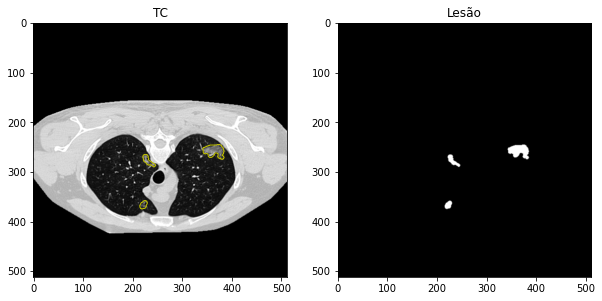

In [79]:
# Obtemos uma imagem de forma aleatória com a sua respectiva máscara
ix = random.randint(0, len(X_treino))

# A máscara existe somente se há lesão na próstata
has_mask = y_treino[ix].max() > 0

# Tamanho da área de plotagem
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# Mostra a imagem original
ax1.imshow(X_treino[ix, ..., 0], cmap = 'gray', interpolation = 'bilinear')

# Se existir lesão (logo há máscara) mostramos no gráfico
if has_mask: 
    # Desenha um contorno na imagem para mostrar a lesão
    ax1.contour(y_treino[ix].squeeze(), colors = 'y', linewidths = 1, levels = [0.5])

# Título    
ax1.set_title('TC')

# Mostra o gráfico
ax2.imshow(y_treino[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Lesão')

#### Arquitetura

In [103]:
# Função para criar duas camadas de convolução
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):

    # Primeira camada
    x = Conv2D(filters = n_filters, 
               kernel_size = (kernel_size, kernel_size),
               kernel_initializer = 'he_normal', 
               padding = 'same')(input_tensor)
    
    # Aplica batch normalization, se definido
    if batchnorm:
        x = BatchNormalization()(x)
        
    # Ativação
    x = Activation('relu')(x)
    
    # Segunda camada
    x = Conv2D(filters = n_filters, 
               kernel_size = (kernel_size, kernel_size),
               kernel_initializer = 'he_normal', 
               padding = 'same')(x)
    
    # Aplica batch normalization, se definido
    if batchnorm:
        x = BatchNormalization()(x)
    
    # Ativação
    x = Activation('relu')(x)
    
    return x

In [104]:
# Função para criar o modelo
def cria_modelo_unet(input_img, n_filters = 32, dropout = 0.1, batchnorm = True):

    # Caminho de contração
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Caminho de expansão
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    # Saída
    outputs = Conv2D(1, (1, 1), activation = 'sigmoid')(c9)
    
    # Modelo
    model = Model(inputs = [input_img], outputs  = [outputs])
    
    return model

In [105]:
# Camada de entrada do modelo
input_img = Input((im_height, im_width, 1), name = 'img')

In [106]:
# Cria o modelo
modelo = cria_modelo_unet(input_img, n_filters = 32, dropout = 0.1, batchnorm = True)

#### Compilação

In [107]:
def dice(y_true, y_pred, smooth=1):
    # y_true = K.cast(y_true,'bool')
    # y_pred = K.cast(y_pred,'bool')
    # y_pred = K.cast(y_pred,'float32')
    # y_true = K.cast(y_true,'float32')
    im_sum = K.sum(y_pred) + K.sum(y_true)
    intersection = y_true * y_pred
    return 2.*K.sum(intersection)/im_sum

def dice_loss(y_true, y_pred, smooth=1):
    return 1-dice(y_true, y_pred)

In [108]:
def iou(y_true, y_pred):
    '''intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score'''
    
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    iou_ = intersection/union
    return iou_

In [109]:
# Compila o modelo
modelo.compile(optimizer = Adam(learning_rate=0.0003), loss = [dice_loss], metrics = [dice, iou])

In [110]:
# Sumário
modelo.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 512, 512, 32) 320         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_55 (BatchNo (None, 512, 512, 32) 128         conv2d_58[0][0]                  
__________________________________________________________________________________________________
activation_54 (Activation)      (None, 512, 512, 32) 0           batch_normalization_55[0][0]     
____________________________________________________________________________________________

#### Callbacks

In [111]:
# callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1),
             ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5, min_lr = 0.00003, verbose = 1),
             ModelCheckpoint('modelos/DATASETPP.h5', 
                             verbose = 1, 
                             save_best_only = True, 
                             save_weights_only = True)]

#### Treinamento do Modelo

In [112]:
%%time
resultados = modelo.fit(X_treino, 
                        y_treino, 
                        batch_size = 6, 
                        epochs = 100, 
                        callbacks = callbacks,
                        validation_data = (X_valid, y_valid))

Epoch 1/100
376/376 [==============================] - 243s 460ms/step - loss: 0.9194 - dice: 0.0806 - iou: 0.0435 - val_loss: 0.7567 - val_dice: 0.2433 - val_iou: 0.1446

Epoch 00001: val_loss improved from inf to 0.75673, saving model to modelos/DATASETPP.h5
Epoch 2/100
376/376 [==============================] - 99s 264ms/step - loss: 0.6620 - dice: 0.3380 - iou: 0.2181 - val_loss: 0.4853 - val_dice: 0.5147 - val_iou: 0.3566

Epoch 00002: val_loss improved from 0.75673 to 0.48526, saving model to modelos/DATASETPP.h5
Epoch 3/100
376/376 [==============================] - 100s 265ms/step - loss: 0.4028 - dice: 0.5972 - iou: 0.4451 - val_loss: 0.3097 - val_dice: 0.6903 - val_iou: 0.5412

Epoch 00003: val_loss improved from 0.48526 to 0.30965, saving model to modelos/DATASETPP.h5
Epoch 4/100
376/376 [==============================] - 100s 266ms/step - loss: 0.3354 - dice: 0.6646 - iou: 0.5186 - val_loss: 0.2552 - val_dice: 0.7448 - val_iou: 0.6058

Epoch 00004: val_loss improved from 0.

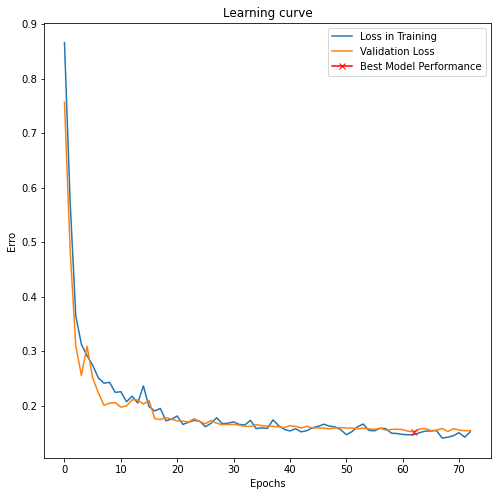

In [113]:
# Resultado do Treinamento
plt.figure(figsize = (8, 8))
plt.title("Learning curve")
plt.plot(resultados.history["loss"], label = "Loss in Training")
plt.plot(resultados.history["val_loss"], label = "Validation Loss")
plt.plot(np.argmin(resultados.history["val_loss"]), 
         np.min(resultados.history["val_loss"]), 
         marker ="x", 
         color = "r", 
         label = "Best Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Erro")
plt.legend();

#### Avaliação do modelo nos dados de teste

In [114]:
# Carrega o modelo treinado
modelo.load_weights('modelos/DATASETPP.h5')

In [115]:
# Avalia o modelo
modelo.evaluate(X_teste, y_teste, verbose = 1)

22/22 [==============================] - 49s 360ms/step - loss: 0.1470 - dice: 0.8530 - iou: 0.7448


[0.14698854088783264, 0.8530113697052002, 0.7447677850723267]

In [116]:
# Previsão do modelo
y_pred = modelo.predict(X_teste) # Primeira etapa do modelo
        
# Cutoff
y_true = (y_teste > 0.5).flatten()
y_pred = (y_pred > 0.5).flatten()

cm = confusion_matrix(y_true,y_pred)
tn, fp, fn, tp = cm.ravel()
dice = (2.0 * tp) / ((2.0 * tp) + fp + fn)
jaccard = (1.0 * tp) / (tp + fp + fn) 
sensitivity = (1.0 * tp) / (tp + fn)
specificity = (1.0 * tn) / (tn + fp)
accuracy = (1.0 * (tn + tp)) / (tn + fp + tp + fn)
auc = 1 - 0.5 * (((1.0 * fp) / (fp + tn)) + ((1.0 * fn) / (fn + tp)))
prec = float(tp)/float(tp + fp)
fscore = float(2*tp)/float(2*tp + fp + fn)

# Print
print("dice: {0:.2f}\n".format(dice))
print("jaccard: {0:.2f}\n".format(jaccard))
print("sensitivity: {0:.2f}\n".format(sensitivity))
print("specificity: {0:.2f}\n".format(specificity))
print("accuracy: {0:.2f}\n".format(accuracy))
print("auc: {0:.2f}\n".format(auc))
print("prec: {0:.2f}\n".format(prec))
print("fscore: {0:.2f}\n".format(fscore))
print('-'*55,'\n')

dice: 0.85

jaccard: 0.75

sensitivity: 0.85

specificity: 1.00

accuracy: 1.00

auc: 0.92

prec: 0.86

fscore: 0.85

------------------------------------------------------- 



#### Visualização das previsões com o modelo treinado

In [120]:
# Previsões
preds_val = modelo.predict(X_teste)

In [121]:
# Threshold de previsão
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [128]:
# Plot
plt.rcParams["axes.grid"] = False

def plot_sample(X, y, preds, ix = None):
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 3, figsize = (20, 10))
    
    ax[0].imshow(X[ix, ..., 0], cmap = 'gray')
    
    #if has_mask:
        #ax[0].contour(y[ix].squeeze(), colors = 'k', levels = [0.5])
    
    ax[0].set_title('Próstata')

    ax[1].imshow(y[ix].squeeze(), cmap='gray')
    
    ax[1].set_title('Label Real')

    ax[2].imshow(preds[ix].squeeze(), vmin = 0, vmax = 1, cmap='gray')
    
    #if has_mask:
        #ax[2].contour(y[ix].squeeze(), colors = 'k', levels = [0.5])
    
    ax[2].set_title('Label Previsto')

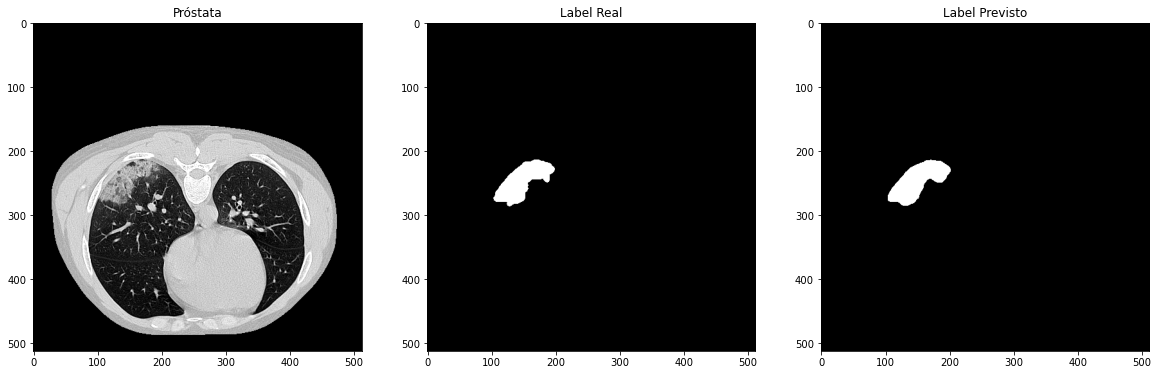

In [129]:
plot_sample(X_teste, y_teste, preds_val_t, ix = 259)

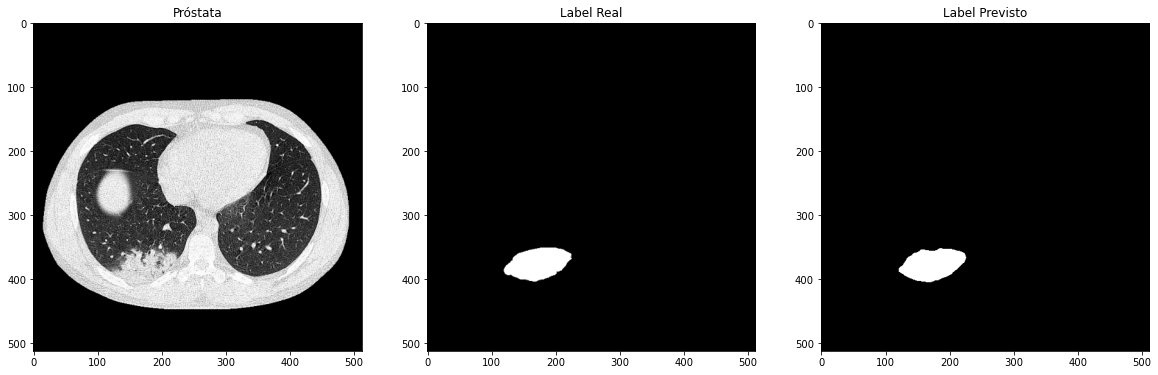

In [131]:
plot_sample(X_teste, y_teste, preds_val_t, ix = 569)

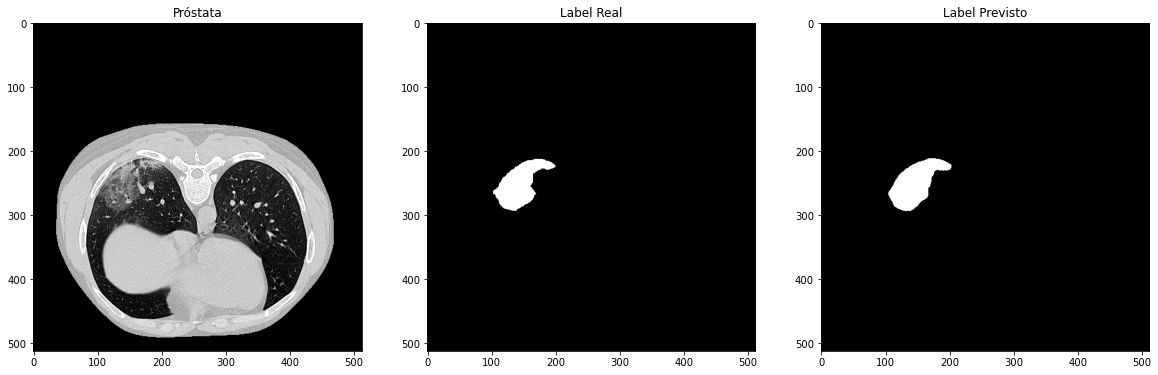

In [132]:
plot_sample(X_teste, y_teste, preds_val_t, ix = 697)

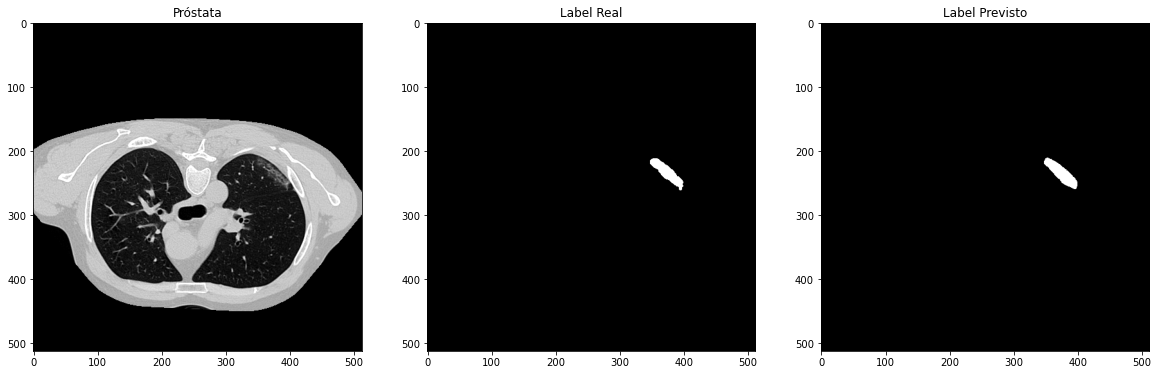

In [133]:
plot_sample(X_teste, y_teste, preds_val_t, ix = 340)

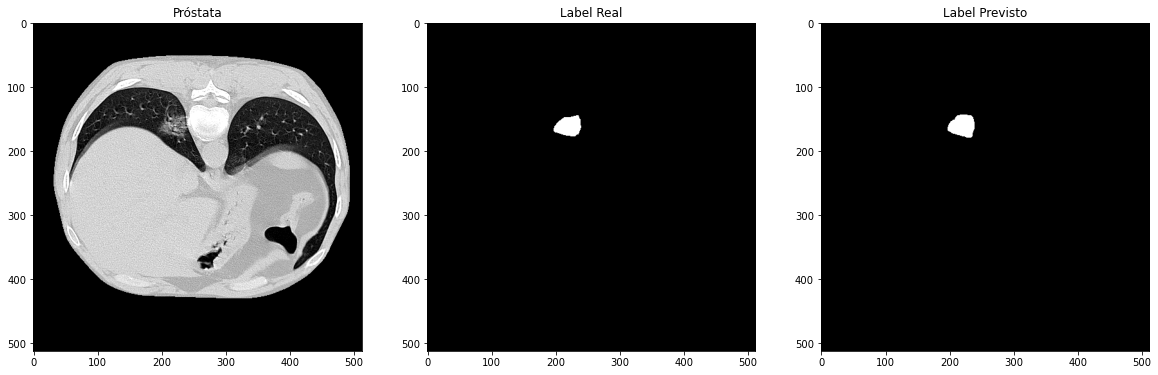

In [134]:
plot_sample(X_teste, y_teste, preds_val_t, ix = 227)

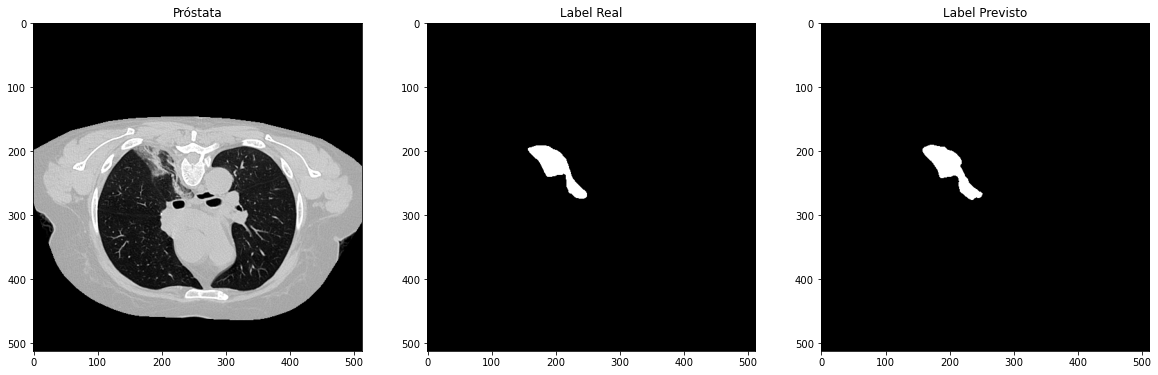

In [135]:
plot_sample(X_teste, y_teste, preds_val_t, ix = 404)

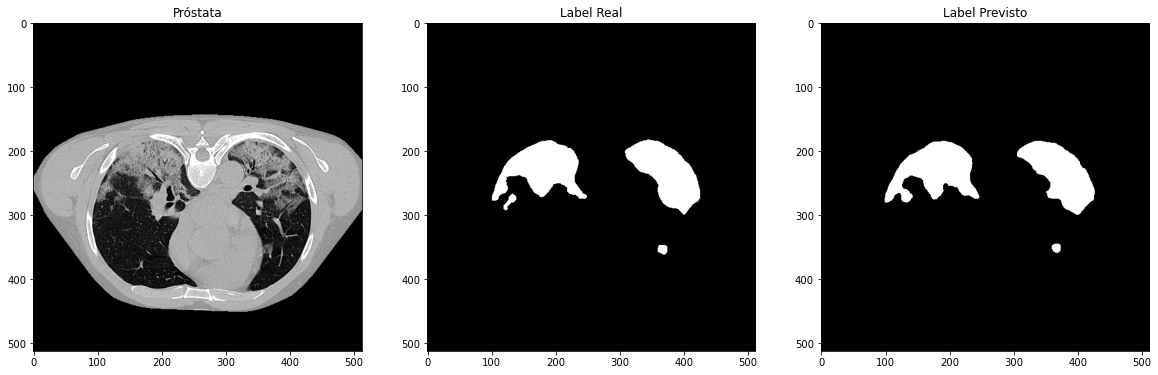

In [136]:
plot_sample(X_teste, y_teste, preds_val_t, ix = 316)